In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
% matplotlib inline
from sklearn.model_selection import train_test_split

In [90]:
#2016年あたりに追加された抜け落ちていたデータをAddして統合したデータフレームをId順にソートしたデータフレームを作成。
df = pd.read_csv("train.csv")
df_add = pd.read_csv("train_add.csv")
df = pd.concat([df, df_add])
df = df.sort_values(by='id', ascending=True)
df.head(10)

,id,y,year,stage,match,gameday,time,home,away,stadium,tv
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌
5,13999,11283,2012,Ｊ１,第１節第１日,03/10(土),14:05,サガン鳥栖,セレッソ大阪,ベストアメニティスタジアム,スカパー／ｅ２／スカパー光／ＮＨＫ佐賀
6,14000,18920,2012,Ｊ１,第１節第１日,03/10(土),17:05,川崎フロンターレ,アルビレックス新潟,等々力陸上競技場,スカパー／ｅ２／スカパー光
7,14001,11437,2012,Ｊ１,第１節第１日,03/10(土),19:04,大宮アルディージャ,ＦＣ東京,ＮＡＣＫ５スタジアム大宮,スカパー／ｅ２／スカパー光／ＮＨＫ ＢＳ１
8,14002,13082,2012,Ｊ１,第１節第２日,03/11(日),14:04,柏レイソル,横浜Ｆ・マリノス,日立柏サッカー場,スカパー／ｅ２／スカパー光（ＴＢＳチャンネル）
0,14003,19010,2012,Ｊ１,第２節第１日,03/17(土),14:04,鹿島アントラーズ,川崎フロンターレ,県立カシマサッカースタジアム,スカパー／ｅ２／スカパー光／ＮＨＫ水戸


In [83]:
df_con = pd.read_csv("condition.csv")
df_con_add = pd.read_csv("condition_add.csv")
df_con = pd.concat([df_con, df_con_add])
df_con = df_con.sort_values(by='id', ascending=True)
df_con.head(-10)

,id,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,...,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
0,13994,1,0,雨,3.8,66%,木村 博之,ベガルタ仙台,林 卓人,菅井 直樹,...,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ
1,13995,1,0,屋内,12.4,43%,西村 雄一,名古屋グランパス,楢﨑 正剛,田中 隼磨,...,吉田 豊,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀
2,13996,2,3,晴一時雨,11.3,41%,高山 啓義,ガンバ大阪,藤ヶ谷 陽介,加地 亮,...,近藤 岳登,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人
3,13997,1,0,曇一時雨のち晴,11.4,52%,松尾 一,サンフレッチェ広島,西川 周作,森脇 良太,...,濱田 水輝,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也
4,13998,0,0,屋内,22.5,32%,廣瀬 格,コンサドーレ札幌,李 昊乗,高木 純平,...,駒野 友一,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一
5,13999,0,0,晴,14.5,33%,井上 知大,サガン鳥栖,赤星 拓,丹羽 竜平,...,茂庭 照幸,藤本 康太,丸橋 祐介,酒本 憲幸,扇原 貴宏,山口 螢,キム ボギョン,清武 弘嗣,ブランキーニョ,ケンペス
6,14000,1,0,曇,7.1,65%,山本 雄大,川崎フロンターレ,西部 洋平,實藤 友紀,...,三門 雄大,鈴木 大輔,大井 健太郎,金 珍洙,菊地 直哉,本間 勲,小谷野 顕治,アラン ミネイロ,矢野 貴章,ブルーノ ロペス
7,14001,0,1,曇,9.2,57%,飯田 淳平,大宮アルディージャ,北野 貴之,村上 和弘,...,徳永 悠平,森重 真人,加賀 健一,太田 宏介,高橋 秀人,梶山 陽平,羽生 直剛,長谷川 アーリアジャスール,谷澤 達也,ルーカス
8,14002,3,3,晴時々曇,12.1,46%,村上 伸次,柏レイソル,菅野 孝憲,酒井 宏樹,...,小林 祐三,栗原 勇蔵,中澤 佑二,金井 貢史,兵藤 慎剛,小椋 祥平,中村 俊輔,齋藤 学,小野 裕二,大黒 将志
0,14003,0,1,雨,13.3,86%,西村 雄一,鹿島アントラーズ,曽ヶ端 準,新井場 徹,...,實藤 友紀,ジェシ,森下 俊,小宮山 尊信,中村 憲剛,柴崎 晃誠,田坂 祐介,山瀬 功治,レナト,小松 塁


In [60]:
stadium = pd.read_csv("stadium.csv")
stadium.head()

,name,address,capa
0,名古屋市瑞穂陸上競技場,愛知県名古屋市瑞穂区山下通5-1,20000
1,豊田スタジアム,愛知県豊田市千石町7-2,40000
2,フクダ電子アリーナ,千葉県千葉市中央区川崎町1-20,18500
3,日立柏サッカー場,千葉県柏市日立台1-2-50,15349
4,ニンジニアスタジアム,愛媛県松山市上野町乙46,15576


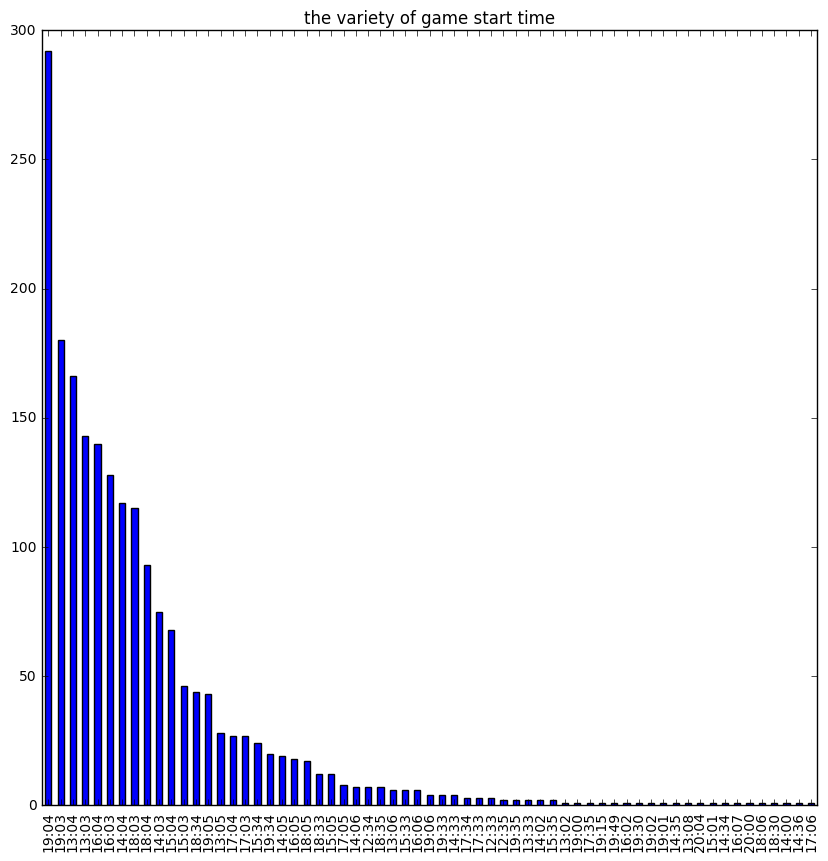

In [61]:
df['time'].value_counts().plot(kind='bar', figsize = (10, 10), fontsize = 10, title = "the variety of game start time")

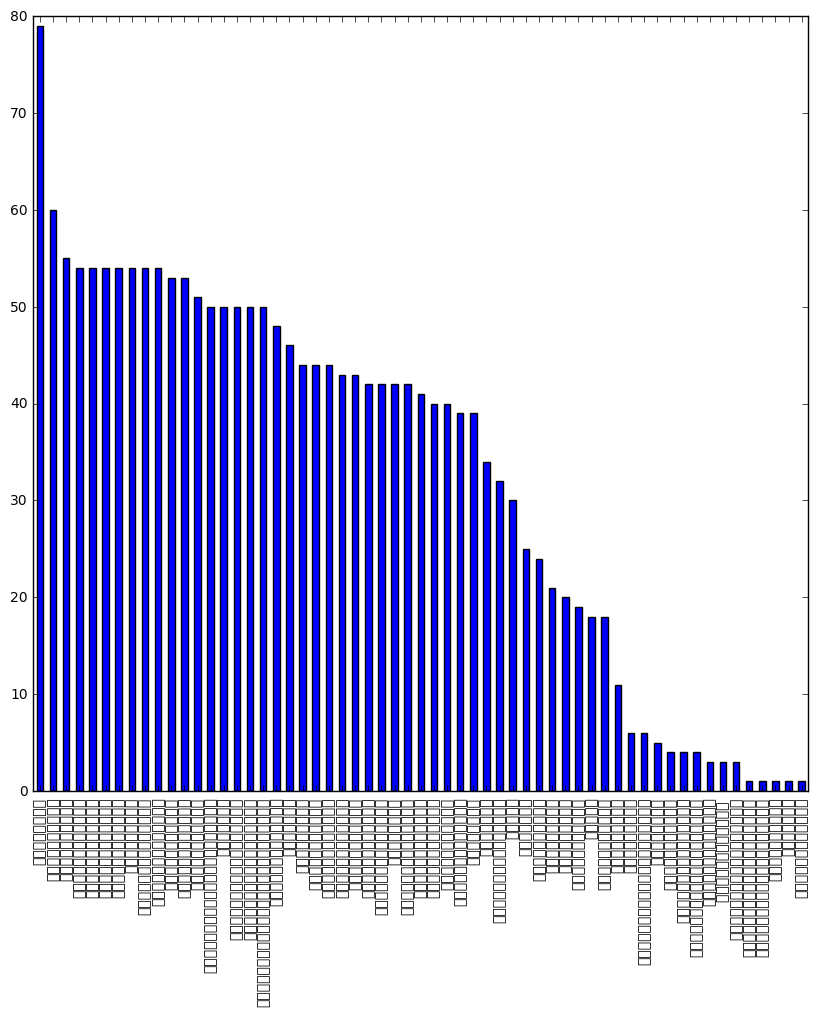

In [62]:
df['stadium'].value_counts().plot(kind='bar', figsize = (10, 10), fontsize = 10)

In [89]:
#文字化け解消まではとりあえず日本語以外のデータを使って解析してみる。
#conditionデータとtrainデータで数がずれているのでIdをKeyにして両方に存在するもの以外は削除する。
df_total = pd.merge(df, df_con, how="inner", on="id")
df_total.head(10)

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,...,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,...,吉田 豊,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,...,近藤 岳登,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,...,濱田 水輝,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,...,駒野 友一,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一
5,13999,11283,2012,Ｊ１,第１節第１日,03/10(土),14:05,サガン鳥栖,セレッソ大阪,ベストアメニティスタジアム,...,茂庭 照幸,藤本 康太,丸橋 祐介,酒本 憲幸,扇原 貴宏,山口 螢,キム ボギョン,清武 弘嗣,ブランキーニョ,ケンペス
6,14000,18920,2012,Ｊ１,第１節第１日,03/10(土),17:05,川崎フロンターレ,アルビレックス新潟,等々力陸上競技場,...,三門 雄大,鈴木 大輔,大井 健太郎,金 珍洙,菊地 直哉,本間 勲,小谷野 顕治,アラン ミネイロ,矢野 貴章,ブルーノ ロペス
7,14001,11437,2012,Ｊ１,第１節第１日,03/10(土),19:04,大宮アルディージャ,ＦＣ東京,ＮＡＣＫ５スタジアム大宮,...,徳永 悠平,森重 真人,加賀 健一,太田 宏介,高橋 秀人,梶山 陽平,羽生 直剛,長谷川 アーリアジャスール,谷澤 達也,ルーカス
8,14002,13082,2012,Ｊ１,第１節第２日,03/11(日),14:04,柏レイソル,横浜Ｆ・マリノス,日立柏サッカー場,...,小林 祐三,栗原 勇蔵,中澤 佑二,金井 貢史,兵藤 慎剛,小椋 祥平,中村 俊輔,齋藤 学,小野 裕二,大黒 将志
9,14003,19010,2012,Ｊ１,第２節第１日,03/17(土),14:04,鹿島アントラーズ,川崎フロンターレ,県立カシマサッカースタジアム,...,實藤 友紀,ジェシ,森下 俊,小宮山 尊信,中村 憲剛,柴崎 晃誠,田坂 祐介,山瀬 功治,レナト,小松 塁


In [ ]:
y = df_total.loc[:,["y"]].values
y = df_total.loc[:,["y"]].values